# 1. You have been given a barGraph.csv file. Using the data of this file you have to draw a bar graph showing all 8 emotions corresponding to each business.

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('barGraph.csv')

df.head()

,Business,anticipation,enjoyment,sad,disgust,anger,surprise,fear,trust
0,Beauty & Spas,0,6.0,1.0,1,1.5,3,0,0
1,Burgers-Restaurants,0,1.0,2.0,1,2.0,0,1,0
2,Pizza,0,6.0,1.0,0,4.0,0,1,0
3,Mexican Restaurants,0,33.0,3.0,3,9.0,2,9,0
4,Modern European-Restaurants,0,150.0,13.5,37,19.0,12,22,0


In [3]:
import matplotlib.pyplot as plt
import numpy as np

In [4]:
#Getting the name of all emotions and dropping the column Business
emotions = list(df.columns[1:])
print(emotions)

['anticipation', 'enjoyment', 'sad', 'disgust', 'anger', 'surprise', 'fear', 'trust']


In [5]:
#Making a dictionary with structure: {emotion1: {"business1" : value1}, {"business2" : value2}.., 
#                                     emotion2: {"business1" : value1}, {"business2" : value2}..,...}
d = {}
for e in emotions:
    #Since every emotion has only one value, taking sum for every emotion
    d[e] = dict(df.groupby("Business")[e].sum())
    
print(d)

{'anticipation': {'Beauty & Spas': 0, 'Burgers-Restaurants': 0, 'Chinese': 0, 'Mexican Restaurants': 0, 'Modern European-Restaurants': 0, 'Pizza': 0}, 'enjoyment': {'Beauty & Spas': 6.0, 'Burgers-Restaurants': 1.0, 'Chinese': 19.5, 'Mexican Restaurants': 33.0, 'Modern European-Restaurants': 150.0, 'Pizza': 6.0}, 'sad': {'Beauty & Spas': 1.0, 'Burgers-Restaurants': 2.0, 'Chinese': 0.0, 'Mexican Restaurants': 3.0, 'Modern European-Restaurants': 13.5, 'Pizza': 1.0}, 'disgust': {'Beauty & Spas': 1, 'Burgers-Restaurants': 1, 'Chinese': 3, 'Mexican Restaurants': 3, 'Modern European-Restaurants': 37, 'Pizza': 0}, 'anger': {'Beauty & Spas': 1.5, 'Burgers-Restaurants': 2.0, 'Chinese': 3.0, 'Mexican Restaurants': 9.0, 'Modern European-Restaurants': 19.0, 'Pizza': 4.0}, 'surprise': {'Beauty & Spas': 3, 'Burgers-Restaurants': 0, 'Chinese': 1, 'Mexican Restaurants': 2, 'Modern European-Restaurants': 12, 'Pizza': 0}, 'fear': {'Beauty & Spas': 0, 'Burgers-Restaurants': 1, 'Chinese': 1, 'Mexican Resta

In [6]:
noOfBusiness = len(d["anticipation"])

barLabel = []

for b in d["anticipation"]:
    barLabel.append(b)

In [7]:
print(barLabel)

['Beauty & Spas', 'Burgers-Restaurants', 'Chinese', 'Mexican Restaurants', 'Modern European-Restaurants', 'Pizza']


In [8]:
barCount = []

for e in emotions:
    bC = []
    
    for b in d[e]:
        bC.append(d[e][b])
    
    barCount.append(bC)

In [9]:
print(barCount)
#It is a list of lists

[[0, 0, 0, 0, 0, 0], [6.0, 1.0, 19.5, 33.0, 150.0, 6.0], [1.0, 2.0, 0.0, 3.0, 13.5, 1.0], [1, 1, 3, 3, 37, 0], [1.5, 2.0, 3.0, 9.0, 19.0, 4.0], [3, 0, 1, 2, 12, 0], [0, 1, 1, 9, 22, 1], [0, 0, 0, 0, 0, 0]]


In [10]:
index = np.arange(noOfBusiness)

barWidth = 0.10

opacity = 1

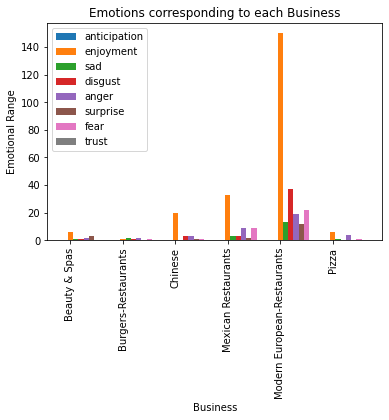

In [11]:
for i in range(len(barCount)):
    plt.bar(index + i*barWidth, barCount[i], barWidth, alpha=opacity, label = emotions[i])
    
plt.xlabel('Business')

plt.ylabel('Emotional Range')

plt.title('Emotions corresponding to each Business')

plt.xticks(index + barWidth, barLabel, rotation=90)

plt.legend()

plt.show()

# 2. Using the data present in barGraph.csv file generate pie-chart showing percentage of emotions for each business.

In [12]:
labels = [] # holds label of each pie

count = 0

title = " "

In [13]:
for i in df:

    if count==0: # skip the first data as it is business category

        count+=1 #increase count

        continue

    labels.append(i)
#Get all the labels

In [14]:
def getinfo(n):
    count=0 # reset count
    sizes = [] # holds size of each pie
    
    for i in df.iloc[n]:
        if count == 0: # if it is first data then set title

            title = i

            count += 1

            continue

        sizes.append(i)
    return title, sizes

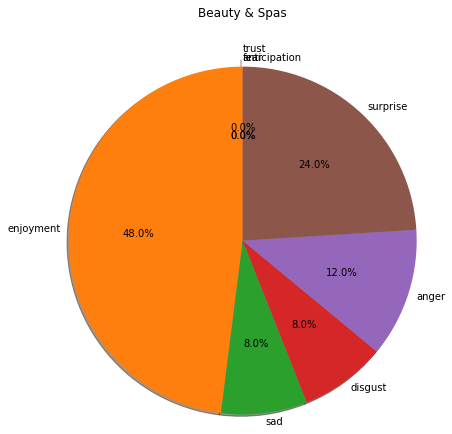

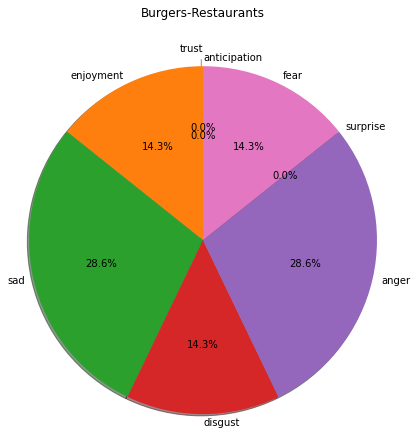

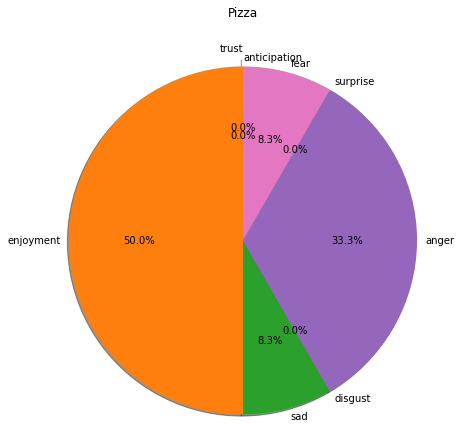

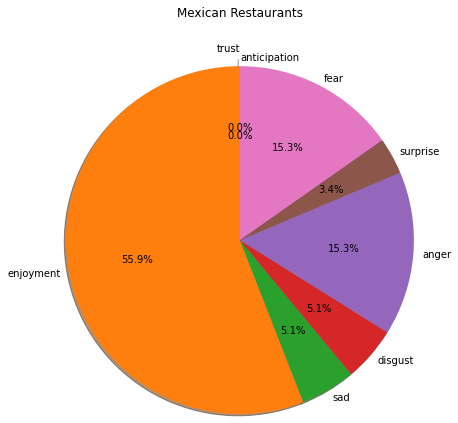

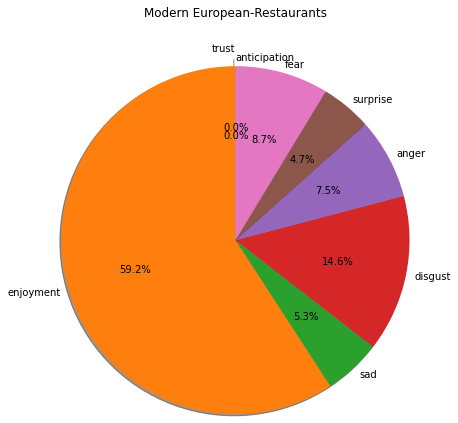

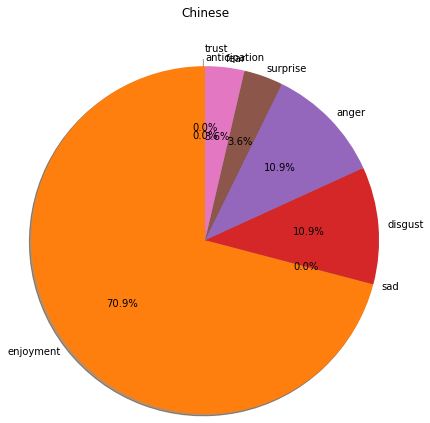

In [15]:
for i in range(len(df["Business"])):
    t, s = getinfo(i)
    
    # np.zeros((1,column)) returns a list of list
    
    explode = np.zeros((1,len(s)))[0]
    explode[7]=.1 # only "explode" the last slice

    # Set aspect ratio to be equal so that pie is drawn as a circle.
    plt.pie(s, explode=explode, labels = labels, labeldistance=1.05, autopct='%1.1f%%', shadow=True,\
            startangle = 90, radius = 2)
    plt.title(t, y = 1.5) #set title
    plt.show()

# 3. Generate a word cloud of your favorite news article or story or anything. This word cloud should contain words having 4 letters or more.

In [16]:
from wordcloud import WordCloud

In [17]:
#Text from: "https://archiveofourown.org/works/8125531"
file = "Harry.txt"
#Reading the text
text = open(file).read() 

In [18]:
#Only keeping the words with 4 or more letters.
List_of_words = [word for word in text.split() if len(word) > 3]
str1 = " "
txt = str1.join(List_of_words) 

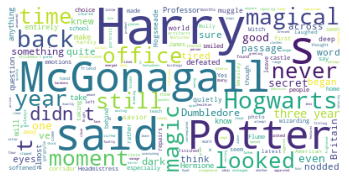

In [19]:
wordcloud = WordCloud(background_color = "white", max_words = 500, max_font_size = 60,\
                      relative_scaling = .3).generate(txt)
plt.figure()

plt.imshow(wordcloud)

plt.axis("off")

plt.show()

# 4. You have been given a file ReviewID.txt. It has 10646 records in it, each record is made up of two fields separated by a colon: like AzSn8aTOyVTUePaIQtTUYA:es . The first field is review ID and the second field is language in which reviews has been written. Read this file and create a bar graph showing the percentage of the reviews written in a particular language. The aim of this problem is to generate a graph using which we can do a comparative analysis of the languages used for writing reviews.

In [20]:
file = "ReviewID.txt"

In [21]:
import csv

In [22]:
with open(file) as f:
    reader = csv.reader(f, delimiter=":")
    ri = []
    lang = []
    for row in reader:
        r = row[0]
        l = row[1]
        ri.append(r)
        lang.append(l)

In [23]:
d = {'review ID': ri,'language':lang}
data = pd.DataFrame(d)
data

,review ID,language
0,hk6_Cu-kQ92hUCd5U9B2-A,fr
1,VgIw0ZpUiYNZb2yVYnHFFA,es
2,oBc-qWYNIESpoQ6BUeDgrQ,de
3,17uZ8kz4Ug1-fMLsCp11lw,de
4,SLDtN77lIAwlahKyseLn0A,de
...,...,...
10641,NwdAANKMqLPgybsrsoRLdg,fr
10642,cfcMIdlqcEvm2tBBQi5KLQ,fr
10643,aZ_DkyOMJJFLcOFWQq0nxg,fr
10644,VWxMFgb1xZCw4WwfUPPLUA,fr


In [24]:
#Getting the count of each language to calculate percentage later.
x = dict(data.groupby('language')['review ID'].count())
print(x)

{'ca': 4, 'cs': 3, 'da': 3, 'de': 3052, 'es': 254, 'fi': 1, 'fr': 7057, 'hu': 4, 'id': 3, 'it': 83, 'ja': 36, 'ms': 4, 'nl': 40, 'no': 13, 'pl': 7, 'pt': 43, 'ro': 5, 'sl': 2, 'sq': 5, 'sv': 15, 'tr': 2, 'vi': 10}


In [25]:
val = x.values()
total = sum(val)
#Getting the percentages
new_val = [v/total*100 for v in val]
key = x.keys()

In [26]:
index = np.arange(len(key))

barWidth = 0.8

opacity = 1

legend = 'Percentage'

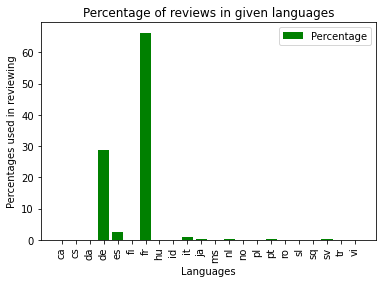

In [27]:
plt.bar(index, new_val, barWidth, alpha=opacity, color = 'g', label = legend)
    
plt.xlabel('Languages')

plt.ylabel('Percentages used in reviewing')

plt.title('Percentage of reviews in given languages')

plt.xticks(index, key, rotation=90)

plt.legend()

plt.show()

Maximum reviews are written in French Language!